In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

# Covid-19 Analysis with Machine Learnia

In [3]:
df = pd.read_excel('dataset.xlsx')
print(f'Ce dataset est composé de {df.shape[0]} échantillons et {df.shape[1]} variables : {df.shape}')

Ce dataset est composé de 5644 échantillons et 111 variables : (5644, 111)


In [4]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.rename(columns={'Patient age quantile' : 'Age', 
                   'SARS-Cov-2 exam result' : 'Covid Result', 
                   'Patient addmited to regular ward (1=yes, 0=no)' : 'Regular Ward Admission', 
                   'Patient addmited to semi-intensive unit (1=yes, 0=no)' : 'Semi-Intensive Admission', 
                   'Patient addmited to intensive care unit (1=yes, 0=no)' : 'Intensive Admission'},
         inplace=True)

## Exploratory Data Analysis

In [6]:
df.describe()

,Age,Regular Ward Admission,Semi-Intensive Admission,Intensive Admission,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439583e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215406e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,0.0,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,0.0,-2.554485e-09,NaN,7.557017e-09,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,NaN,-1.986821e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,NaN,-5.731216e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.003697e+00,1.003697e+00,NaN,1.003697e+00,1.003697e+00,1.003697e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195

In [7]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

### Missing values

In [8]:
listna = df.isna().sum()
missing_values_percentage = (df.isna().sum(axis=0).sum() / df.size)*100
print(f'Il y a {missing_values_percentage.round()} % de valeurs manquantes.')
print(f'Il y a des missing values dans {listna[listna>0].shape} colonnes du dataset.')
print(f'Il manque en moyenne {listna[listna>0].mean().round()} valerus par colonne.')

Il y a 88.0 % de valeurs manquantes.
Il y a des missing values dans (105,) colonnes du dataset.
Il manque en moyenne 5254.0 valerus par colonne.


<Axes: >

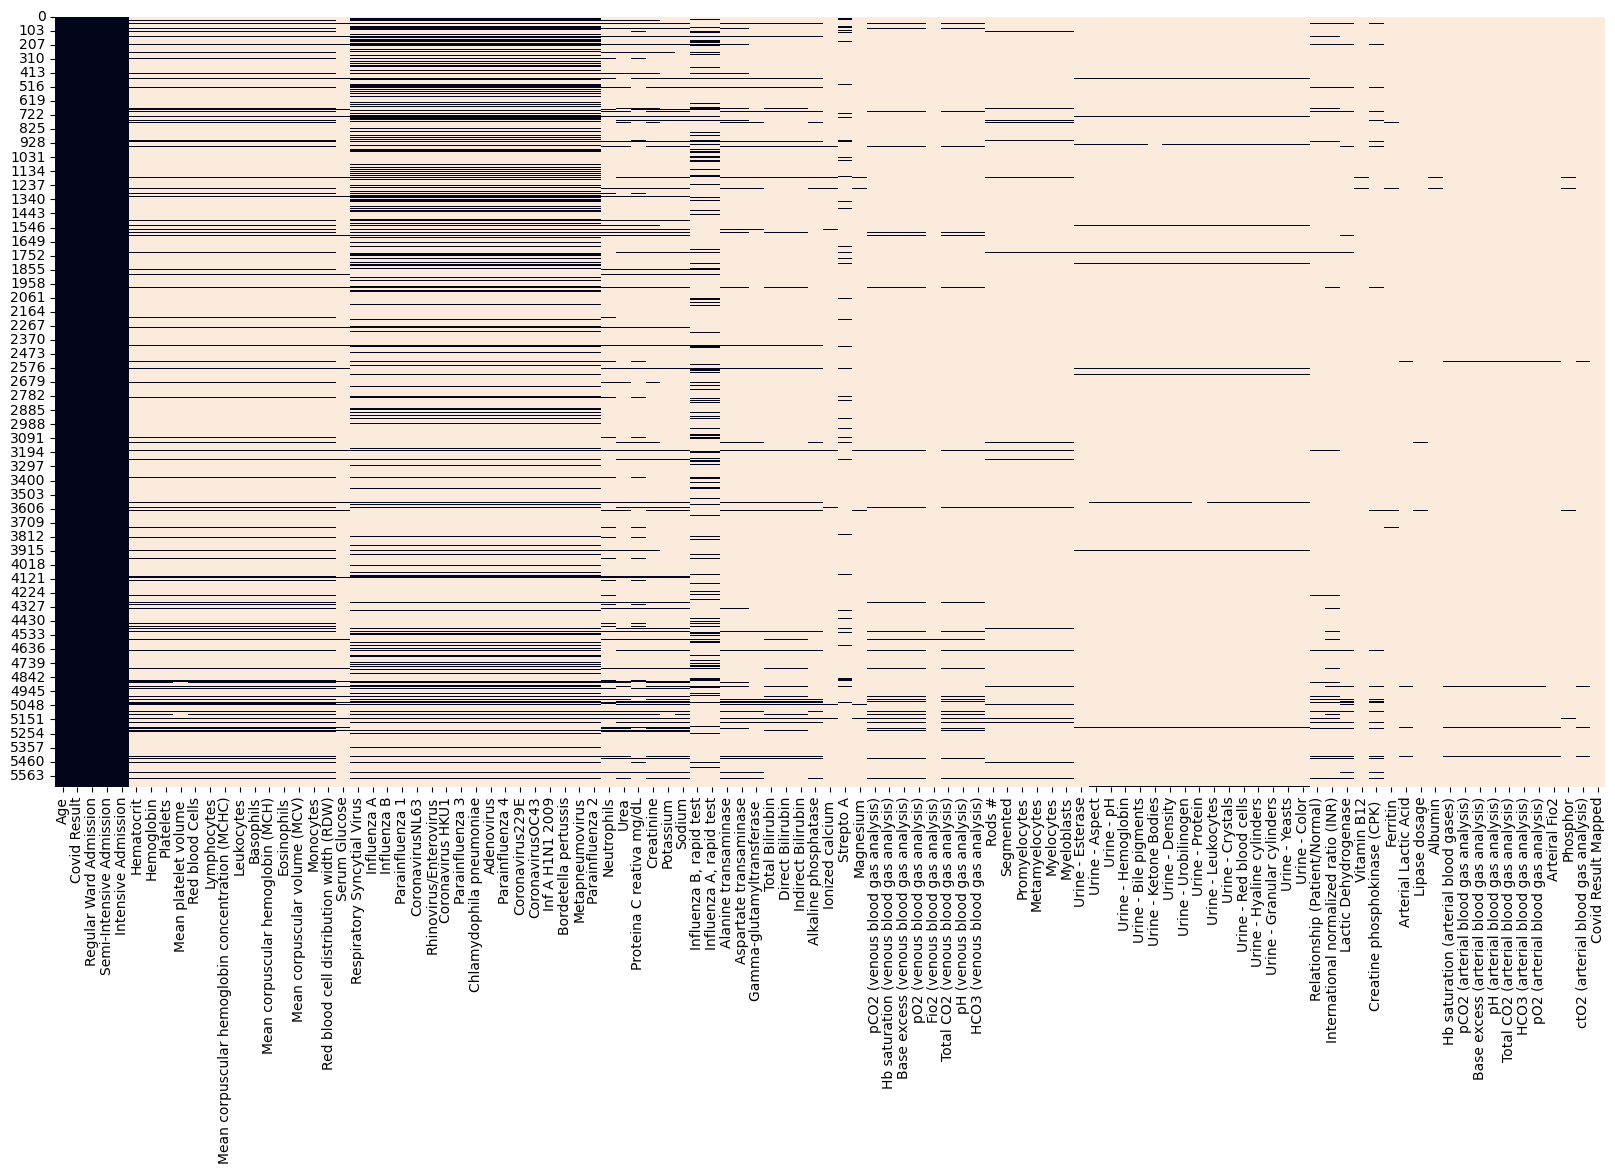

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

Text(0.5, 1.0, 'Missing values per rows evolution')

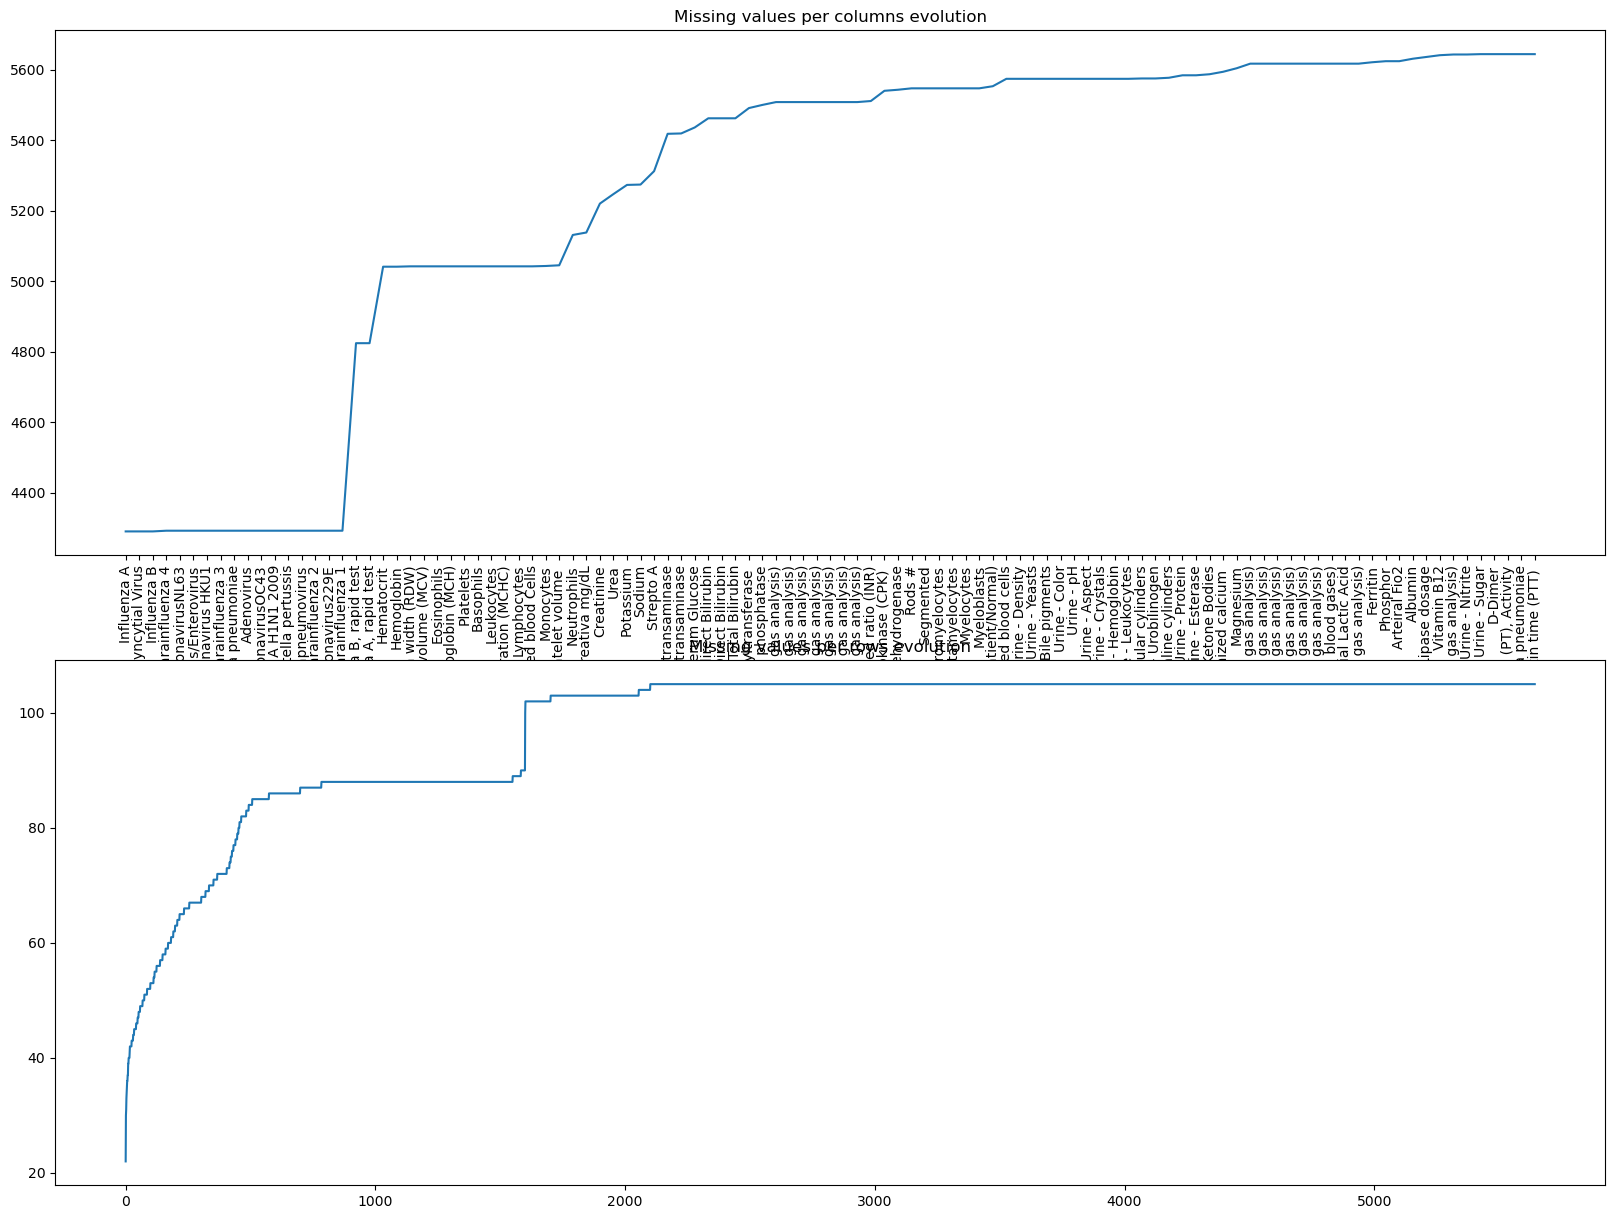

In [10]:
fig = plt.figure(figsize=(20,15))
plt.subplot(211)
plt.plot(listna[listna>0].sort_values())
plt.xticks(rotation=90)
plt.title("Missing values per columns evolution")
plt.subplot(212)
row_missing_values = df.isna().sum(axis=1).sort_values().reset_index()
plt.plot(row_missing_values[0])
plt.title("Missing values per rows evolution")

In [11]:
# Looking for missing values in target and patient id
print(df.isna().sum()[df.isna().sum() == 0])
print()


Patient ID                  0
Age                         0
Covid Result                0
Regular Ward Admission      0
Semi-Intensive Admission    0
Intensive Admission         0
dtype: int64



In [12]:
# Columns where all values are missing, they should be dropped
cols_to_drop = df.isna().sum()[df.isna().sum() == df.shape[0]].index.to_list()
df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop

['Mycoplasma pneumoniae',
 'Urine - Sugar',
 'Partial thromboplastin time\xa0(PTT)\xa0',
 'Prothrombin time (PT), Activity',
 'D-Dimer']

In [13]:
# We can drop the id as it does not bring valuable information 
df.drop(columns=['Patient ID'], inplace=True)

In [14]:
df.drop(columns=['Urine - Nitrite'], inplace=True) # No value except one called "not done"

### Target Exploration

Seulement 10% des échantillons sont positifs au covid soit 558 personnes. Le dataset est déséquilibré.


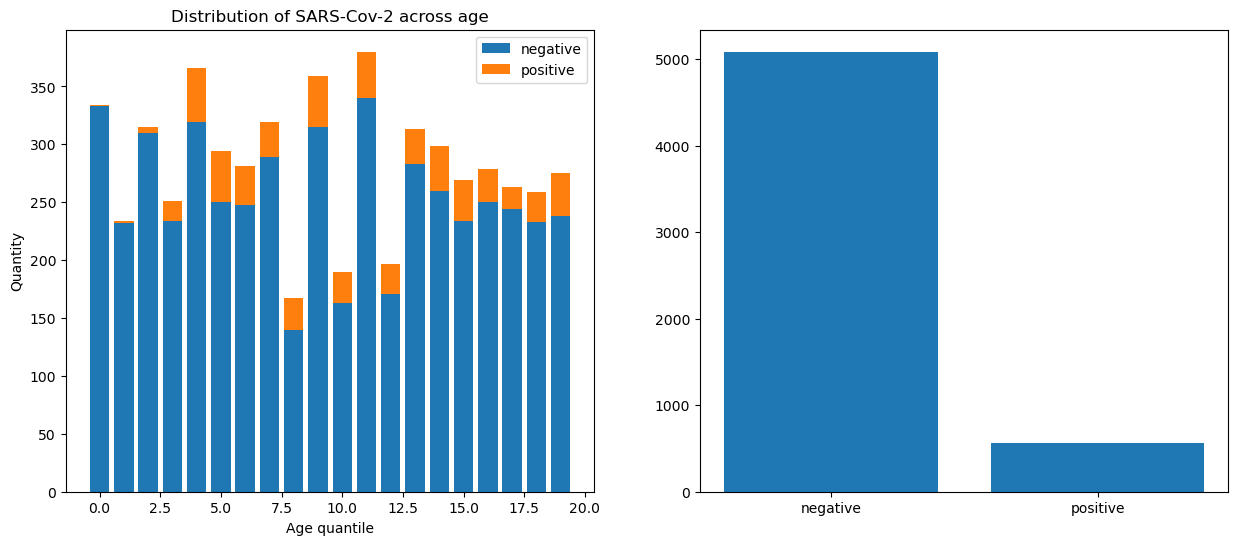

In [15]:
group  = df.groupby(['Covid Result', 'Age'])['Covid Result'].count()
# 1 quantile a l'air de représenter 5 ans car on a 20 quantiles ce qui irait de 0 à 100 ans
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.bar(group['negative'].index, group['negative'].values, label='negative')
plt.bar(group['positive'].index, group['positive'].values, bottom=group['negative'].values, label='positive')
plt.xlabel('Age quantile')
plt.ylabel('Quantity')
plt.legend()
plt.title('Distribution of SARS-Cov-2 across age')
plt.subplot(122)
plt.bar(df['Covid Result'].value_counts().index, df['Covid Result'].value_counts().values)
positive_percent = (df[df['Covid Result']=="positive"].shape[0] / df.shape[0]) * 100
n_positive = df[df['Covid Result']=="positive"].shape[0]
print(f'Seulement {round(positive_percent)}% des échantillons sont positifs au covid soit {n_positive} personnes. Le dataset est déséquilibré.')


In [16]:
# SARS-Cov-2 exam result
# Patient addmited to regular ward (1=yes, 0=no)
# Patient addmited to semi-intensive unit (1=yes, 0=no)
# Patient addmited to intensive care unit (1=yes, 0=no)

([0, 1, 2],
 [Text(0, 0, 'Regular Ward Admission'),
  Text(1, 0, 'Semi-Intensive Admission'),
  Text(2, 0, 'Intensive Admission')])

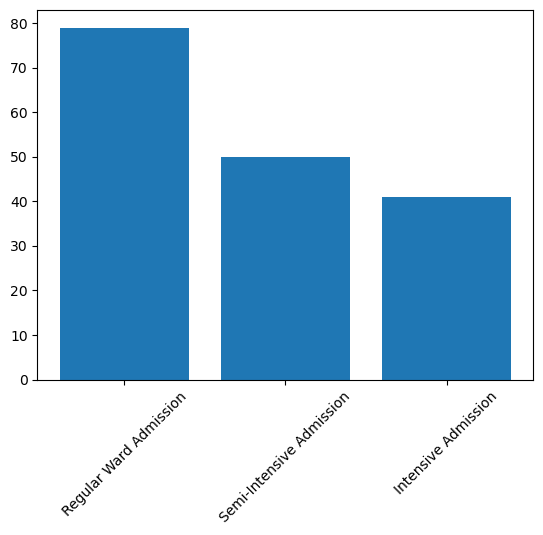

In [17]:
plt.bar(df.iloc[:, 2:5].sum().index, df.iloc[:, 2:5].sum().values)
plt.xticks(rotation=45)


In [18]:
# Check if a patient can be admitted through multiple ward
df.iloc[:, 2:5].all(axis=0) == 1
# Those column are mutually exclusive

Regular Ward Admission      False
Semi-Intensive Admission    False
Intensive Admission         False
dtype: bool

In [19]:
df.columns

Index(['Age', 'Covid Result', 'Regular Ward Admission',
       'Semi-Intensive Admission', 'Intensive Admission', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=104)

In [20]:
# Est-ce que tous les patients en ward avaient le covid ?
n_negative_hospitalized = df[df['Covid Result'] == 'negative'].iloc[:,2:5].sum()
print(n_negative_hospitalized)
print(f'Soit {n_negative_hospitalized.sum()} patients hospitalisés contre 506 non-hospitalisés' )

Regular Ward Admission      43
Semi-Intensive Admission    42
Intensive Admission         33
dtype: int64
Soit 118 patients hospitalisés contre 506 non-hospitalisés


In [21]:
# Est-ce que tous les patients qui avaient le covid sont allés en ward ?
print(f'Il y a {n_positive} personnes positives dont :')
n_positive_hospitalized = df[df['Covid Result'] == 'positive'].iloc[:,2:5].sum()
print(n_positive_hospitalized)
print(f'Soit {n_positive_hospitalized.sum()} patients hospitalisés contre 506 non-hospitalisés' )

Il y a 558 personnes positives dont :
Regular Ward Admission      36
Semi-Intensive Admission     8
Intensive Admission          8
dtype: int64
Soit 52 patients hospitalisés contre 506 non-hospitalisés


In [22]:
df[df['Covid Result'] == 'negative']['Covid Result']

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5637    negative
5638    negative
5640    negative
5641    negative
5642    negative
Name: Covid Result, Length: 5086, dtype: object

In [23]:
# Check if there is any different values or typos in the target column
print(df['Covid Result'].unique())
# No problem, we can encode them to 0=negative and 1=positive
# Method 1 to encode label
df['Covid Result'] = df['Covid Result'].map({'negative':0, 'positive':1})
# Method 2 to encode label
#encodelabel = LabelEncoder()
#df['Covid Result Encoded'] = encodelabel.fit_transform(df['Covid Result'])

['negative' 'positive']


In [24]:
# Check if there is any different values or typos in the target column
print(df['Covid Result'].unique())
# No problem, we can encode them to 0=negative and 1=positive
df['Covid Result Mapped'] = df['Covid Result'].map({'negative':0, 'positive':1})

[0 1]


In [25]:
mask = df.dtypes == object
object_col = mask[mask].index.to_list()
print(object_col)

['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A', 'Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']


### Urine Eploration

In [26]:
cols_urine = [col for col in df.columns if 'Urine' in col]
perc_na_urine = (df[cols_urine].isna().sum() / df[cols_urine].shape[0])*100
perc_na_urine

Urine - Esterase              98.936924
Urine - Aspect                98.759745
Urine - pH                    98.759745
Urine - Hemoglobin            98.759745
Urine - Bile pigments         98.759745
Urine - Ketone Bodies         98.990078
Urine - Density               98.759745
Urine - Urobilinogen          98.777463
Urine - Protein               98.936924
Urine - Leukocytes            98.759745
Urine - Crystals              98.759745
Urine - Red blood cells       98.759745
Urine - Hyaline cylinders     98.812899
Urine - Granular cylinders    98.777463
Urine - Yeasts                98.759745
Urine - Color                 98.759745
dtype: float64

In [27]:
# We can drop the row at index 177 because its the only one to contains the category 'not_done' 
# The category 'not_done' showns in different columns will disappear
df.drop(index=177, inplace=True)
# We can cast to the correct data types
df = df.astype({'Urine - pH':'float'})

In [28]:
urine_data = df[df[cols_urine].isna().sum(axis=1) < 17][cols_urine]
urine_data.isna().sum(axis=1).value_counts()
# We have 5574 rows with full missing values for the urine and only 69 rows with more information

16    5574
0       40
1       23
2        4
4        1
3        1
Name: count, dtype: int64

In [29]:
# We have very few values for the urine (1%)
# We should extract information from those 16 columns to summarize into 1
# Maybe by using PCA ?
# Since there is missing values in those 1%, we can do imputation ?
[print(f'{col} : {df[col].unique()}') for col in df[cols_urine] if df[col].dtype == 'object']

Urine - Esterase : [nan 'absent']
Urine - Aspect : [nan 'clear' 'cloudy' 'lightly_cloudy']
Urine - Hemoglobin : [nan 'absent' 'present']
Urine - Bile pigments : [nan 'absent']
Urine - Ketone Bodies : [nan 'absent']
Urine - Urobilinogen : [nan 'normal']
Urine - Protein : [nan 'absent']
Urine - Leukocytes : [nan '38000' '5942000' '22000' '<1000' '3000' '16000' '7000' '5300' '1000'
 '4000' '5000' '10600' '6000' '2500' '2600' '23000' '124000' '8000'
 '29000' '2000' '624000' '40000' '3310000' '229000' '19000' '28000'
 '10000' '4600' '77000' '43000']
Urine - Crystals : [nan 'Ausentes' 'Urato Amorfo --+' 'Oxalato de Cálcio +++'
 'Oxalato de Cálcio -++' 'Urato Amorfo +++']
Urine - Hyaline cylinders : [nan 'absent']
Urine - Granular cylinders : [nan 'absent']
Urine - Yeasts : [nan 'absent']
Urine - Color : [nan 'light_yellow' 'yellow' 'citrus_yellow']


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [30]:
# The leucocytes goes from less than 1000 to 5942000
# Since <1000 is annoying to cast to int, I will replace it by 500
df['Urine - Leukocytes'].replace(['<1000'],['501'], inplace=True)
df = df.astype({'Urine - Leukocytes':'float'})
leucolist = df['Urine - Leukocytes'].value_counts().sort_index()
# Maybe we should do 3-4 class instead if going numerical

### Disease Exploration

In [31]:
disease = ['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 
'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test']
[print(f'{col} : {df[col].unique()}') for col in df[disease]]
print(len(disease))

Respiratory Syncytial Virus : [nan 'not_detected' 'detected']
Influenza A : [nan 'not_detected' 'detected']
Influenza B : [nan 'not_detected' 'detected']
Parainfluenza 1 : [nan 'not_detected' 'detected']
CoronavirusNL63 : [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus : [nan 'detected' 'not_detected']
Coronavirus HKU1 : [nan 'not_detected' 'detected']
Parainfluenza 3 : [nan 'not_detected' 'detected']
Chlamydophila pneumoniae : [nan 'not_detected' 'detected']
Adenovirus : [nan 'not_detected' 'detected']
Parainfluenza 4 : [nan 'not_detected' 'detected']
Coronavirus229E : [nan 'not_detected' 'detected']
CoronavirusOC43 : [nan 'not_detected' 'detected']
Inf A H1N1 2009 : [nan 'not_detected' 'detected']
Bordetella pertussis : [nan 'not_detected' 'detected']
Metapneumovirus : [nan 'not_detected' 'detected']
Parainfluenza 2 : [nan 'not_detected']
Influenza B, rapid test : [nan 'negative' 'positive']
Influenza A, rapid test : [nan 'negative' 'positive']
19


In [32]:
perc_na_disease = (df[disease].isna().sum() / df[disease].shape[0])*100
perc_na_disease

Respiratory Syncytial Virus    76.023392
Influenza A                    76.023392
Influenza B                    76.023392
Parainfluenza 1                76.058834
CoronavirusNL63                76.058834
Rhinovirus/Enterovirus         76.058834
Coronavirus HKU1               76.058834
Parainfluenza 3                76.058834
Chlamydophila pneumoniae       76.058834
Adenovirus                     76.058834
Parainfluenza 4                76.058834
Coronavirus229E                76.058834
CoronavirusOC43                76.058834
Inf A H1N1 2009                76.058834
Bordetella pertussis           76.058834
Metapneumovirus                76.058834
Parainfluenza 2                76.058834
Influenza B, rapid test        85.468722
Influenza A, rapid test        85.468722
dtype: float64

In [33]:
[print(f'{col} : {df[col].unique()}') for col in disease]

Respiratory Syncytial Virus : [nan 'not_detected' 'detected']
Influenza A : [nan 'not_detected' 'detected']
Influenza B : [nan 'not_detected' 'detected']
Parainfluenza 1 : [nan 'not_detected' 'detected']
CoronavirusNL63 : [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus : [nan 'detected' 'not_detected']
Coronavirus HKU1 : [nan 'not_detected' 'detected']
Parainfluenza 3 : [nan 'not_detected' 'detected']
Chlamydophila pneumoniae : [nan 'not_detected' 'detected']
Adenovirus : [nan 'not_detected' 'detected']
Parainfluenza 4 : [nan 'not_detected' 'detected']
Coronavirus229E : [nan 'not_detected' 'detected']
CoronavirusOC43 : [nan 'not_detected' 'detected']
Inf A H1N1 2009 : [nan 'not_detected' 'detected']
Bordetella pertussis : [nan 'not_detected' 'detected']
Metapneumovirus : [nan 'not_detected' 'detected']
Parainfluenza 2 : [nan 'not_detected']
Influenza B, rapid test : [nan 'negative' 'positive']
Influenza A, rapid test : [nan 'negative' 'positive']


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [34]:
[print(f'{col} : {df[col].unique()}') for col in object_col]


Respiratory Syncytial Virus : [nan 'not_detected' 'detected']
Influenza A : [nan 'not_detected' 'detected']
Influenza B : [nan 'not_detected' 'detected']
Parainfluenza 1 : [nan 'not_detected' 'detected']
CoronavirusNL63 : [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus : [nan 'detected' 'not_detected']
Coronavirus HKU1 : [nan 'not_detected' 'detected']
Parainfluenza 3 : [nan 'not_detected' 'detected']
Chlamydophila pneumoniae : [nan 'not_detected' 'detected']
Adenovirus : [nan 'not_detected' 'detected']
Parainfluenza 4 : [nan 'not_detected' 'detected']
Coronavirus229E : [nan 'not_detected' 'detected']
CoronavirusOC43 : [nan 'not_detected' 'detected']
Inf A H1N1 2009 : [nan 'not_detected' 'detected']
Bordetella pertussis : [nan 'not_detected' 'detected']
Metapneumovirus : [nan 'not_detected' 'detected']
Parainfluenza 2 : [nan 'not_detected']
Influenza B, rapid test : [nan 'negative' 'positive']
Influenza A, rapid test : [nan 'negative' 'positive']
Strepto A : [nan 'positive' 'neg

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Identification des outliers

### Relations Features / Target (Histogramme, boxplot)